In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp1
import os
import math
import networkx as nx
from colour import Color
#import SciencePlots


from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
SFHH = pd.read_csv('E:/Desktop/毕业论文/论文1/data/tij_SFHH/202306.csv',names = ['time','i','j'],header = None)
ij = pd.read_csv('E:/Desktop/毕业论文/论文1/data/tij_SFHH/202306label.csv',names = ['lable'],header = None)
data222 = pd.read_csv('E:/Desktop/毕业论文/论文1/data/lamada.csv',header = None)

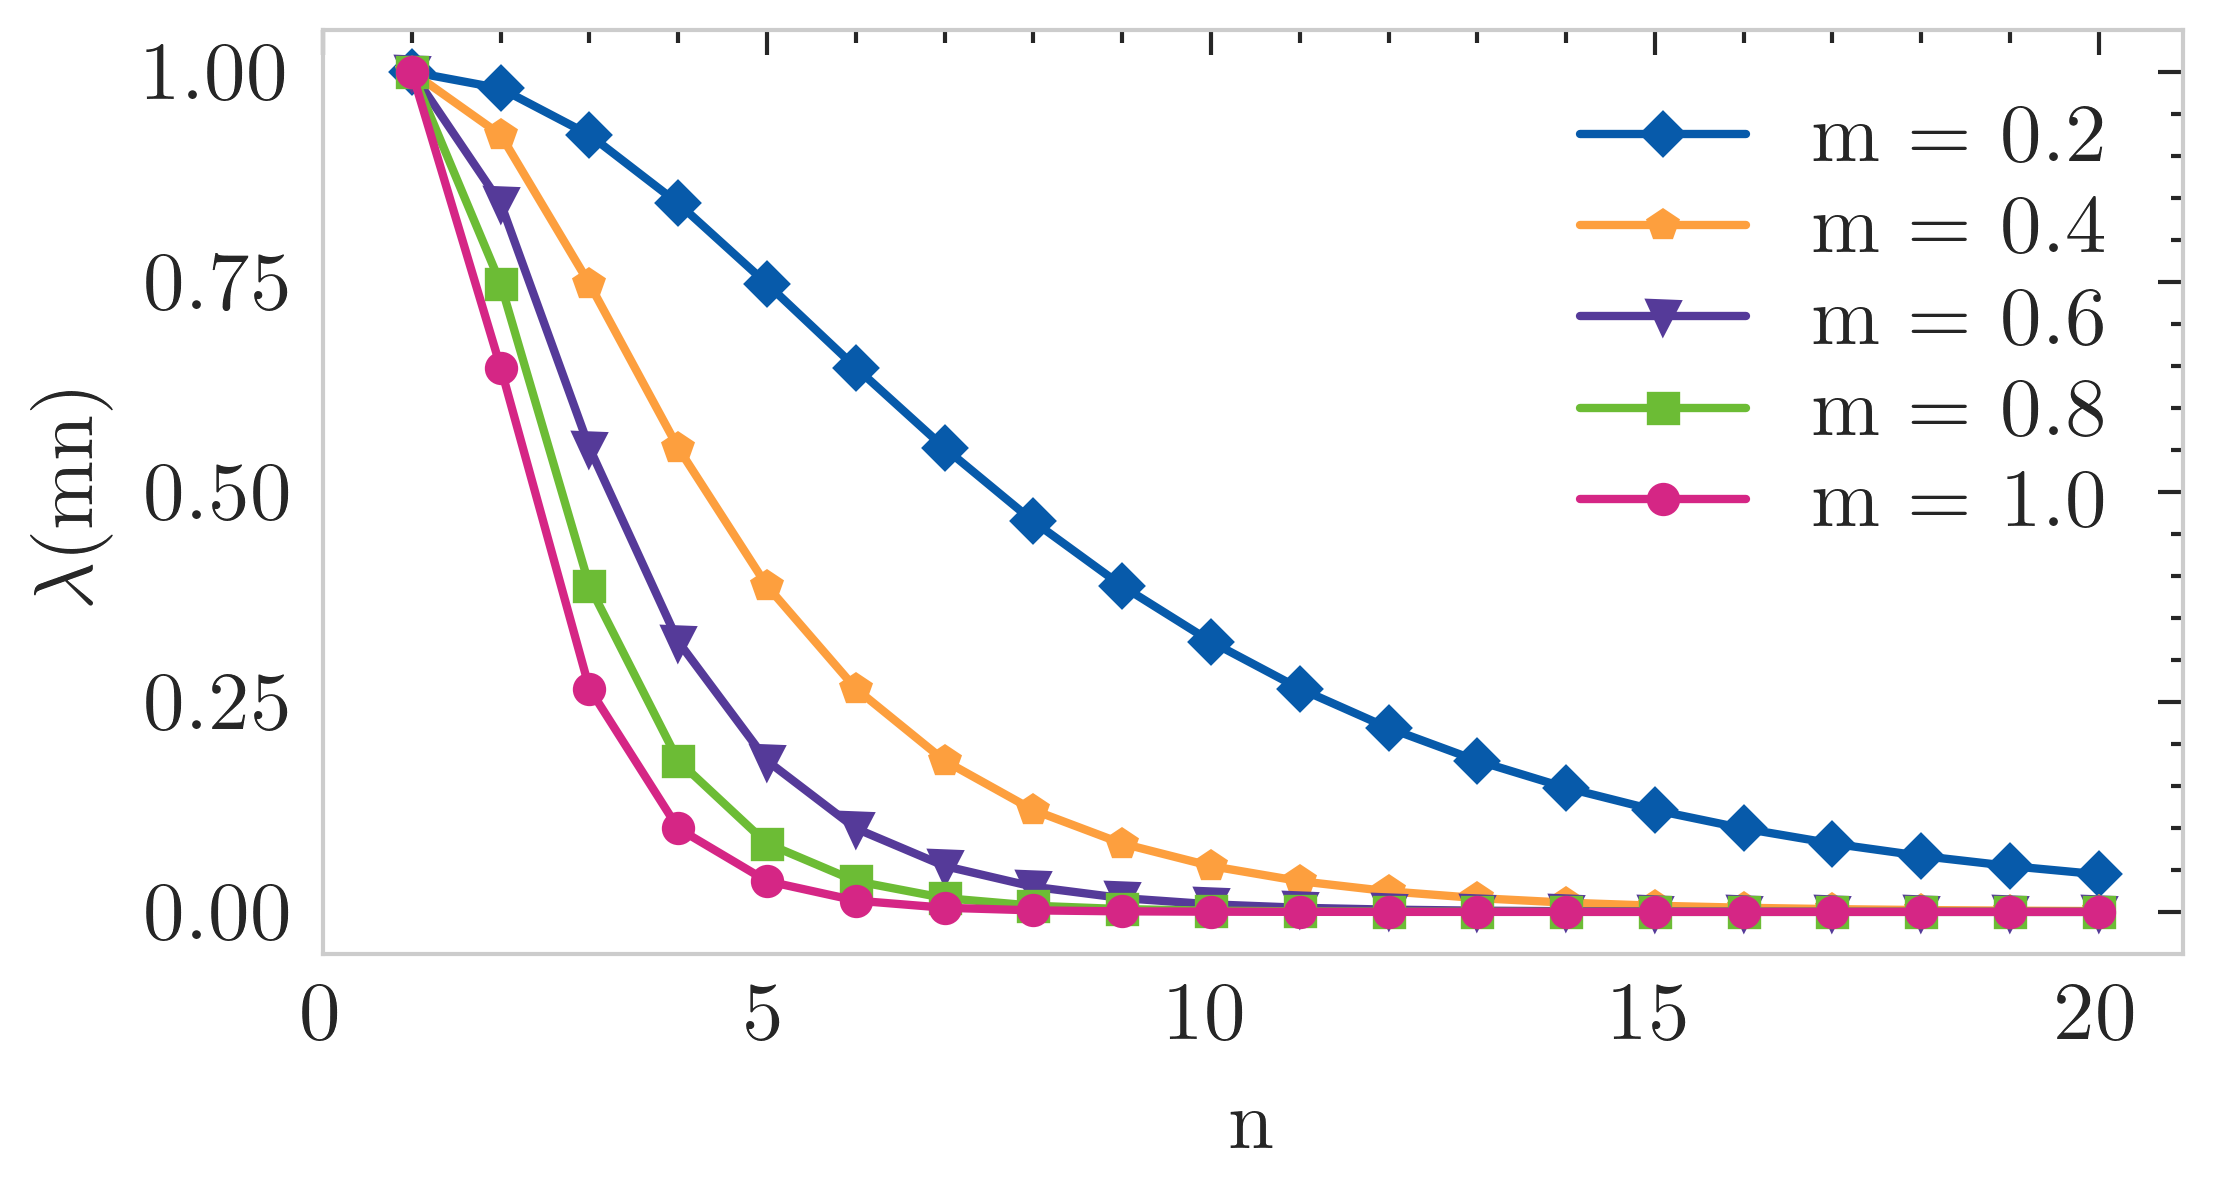

In [22]:
#from sympy import *
#linecolor = ('#d67274','#b1c769','#ff2468','#0f7601','#C83828','#005b63')

linecolor = ('#d52685','#6cbc35','#553a99','#fd9f3e','#075aaa')
plt.style.use('science')
#xx=Symbol("xx")


n = 20
x = np.zeros(n,dtype=np.float32)
y1 = np.zeros(n,dtype=np.float32) 
y2 = np.zeros(n,dtype=np.float32)
y3 = np.zeros(n,dtype=np.float32)
y4 = np.zeros(n,dtype=np.float32)
y5 = np.zeros(n,dtype=np.float32)


for i in range(n):
    x[i] = i+1
    y1[i] = 2/(math.exp(i)+math.exp(-i))
    y2[i] = 2/(math.exp(0.8*i)+math.exp(-i*0.8))
    y3[i] = 2/(math.exp(0.6*i)+math.exp(-i*0.6))
    y4[i] = 2/(math.exp(0.4*i)+math.exp(-i*0.4))
    y5[i] = 2/(math.exp(0.2*i)+math.exp(-i*0.2))
    

plt.figure(figsize=(4,2),dpi=600)
plt.subplots_adjust(wspace=0.4)
font_size = 10


plt.plot(x,y5, color=linecolor[4],label ='m = 0.2',linewidth = 1,linestyle = '-',marker = 'D',markersize = 3,markeredgecolor = linecolor[4])
plt.plot(x,y4, color=linecolor[3],label ='m = 0.4',linewidth = 1,linestyle = '-',marker = 'p',markersize = 3,markeredgecolor = linecolor[3])
plt.plot(x,y3, color=linecolor[2],label ='m = 0.6',linewidth = 1,linestyle = '-',marker = 'v',markersize = 3,markeredgecolor = linecolor[2])
plt.plot(x,y2, color=linecolor[1],label ='m = 0.8',linewidth = 1,linestyle = '-',marker = 's',markersize = 3,markeredgecolor = linecolor[1])
plt.plot(x,y1, color=linecolor[0],label ='m = 1.0',linewidth = 1,linestyle = '-',marker = 'o',markersize = 3,markeredgecolor = linecolor[0])


plt.legend(ncol=1, loc='upper right',frameon = False,labelspacing=0.2 )
plt.xlabel('n',)
plt.ylabel(r'$\lambda$'+ '(mn)')
plt.xticks((0,5,10,15,20)) 


plt.grid(False)

#plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_1.eps',bbox_inches='tight',pad_inches=0.0)
plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_1.pdf',bbox_inches='tight',pad_inches=0.0)

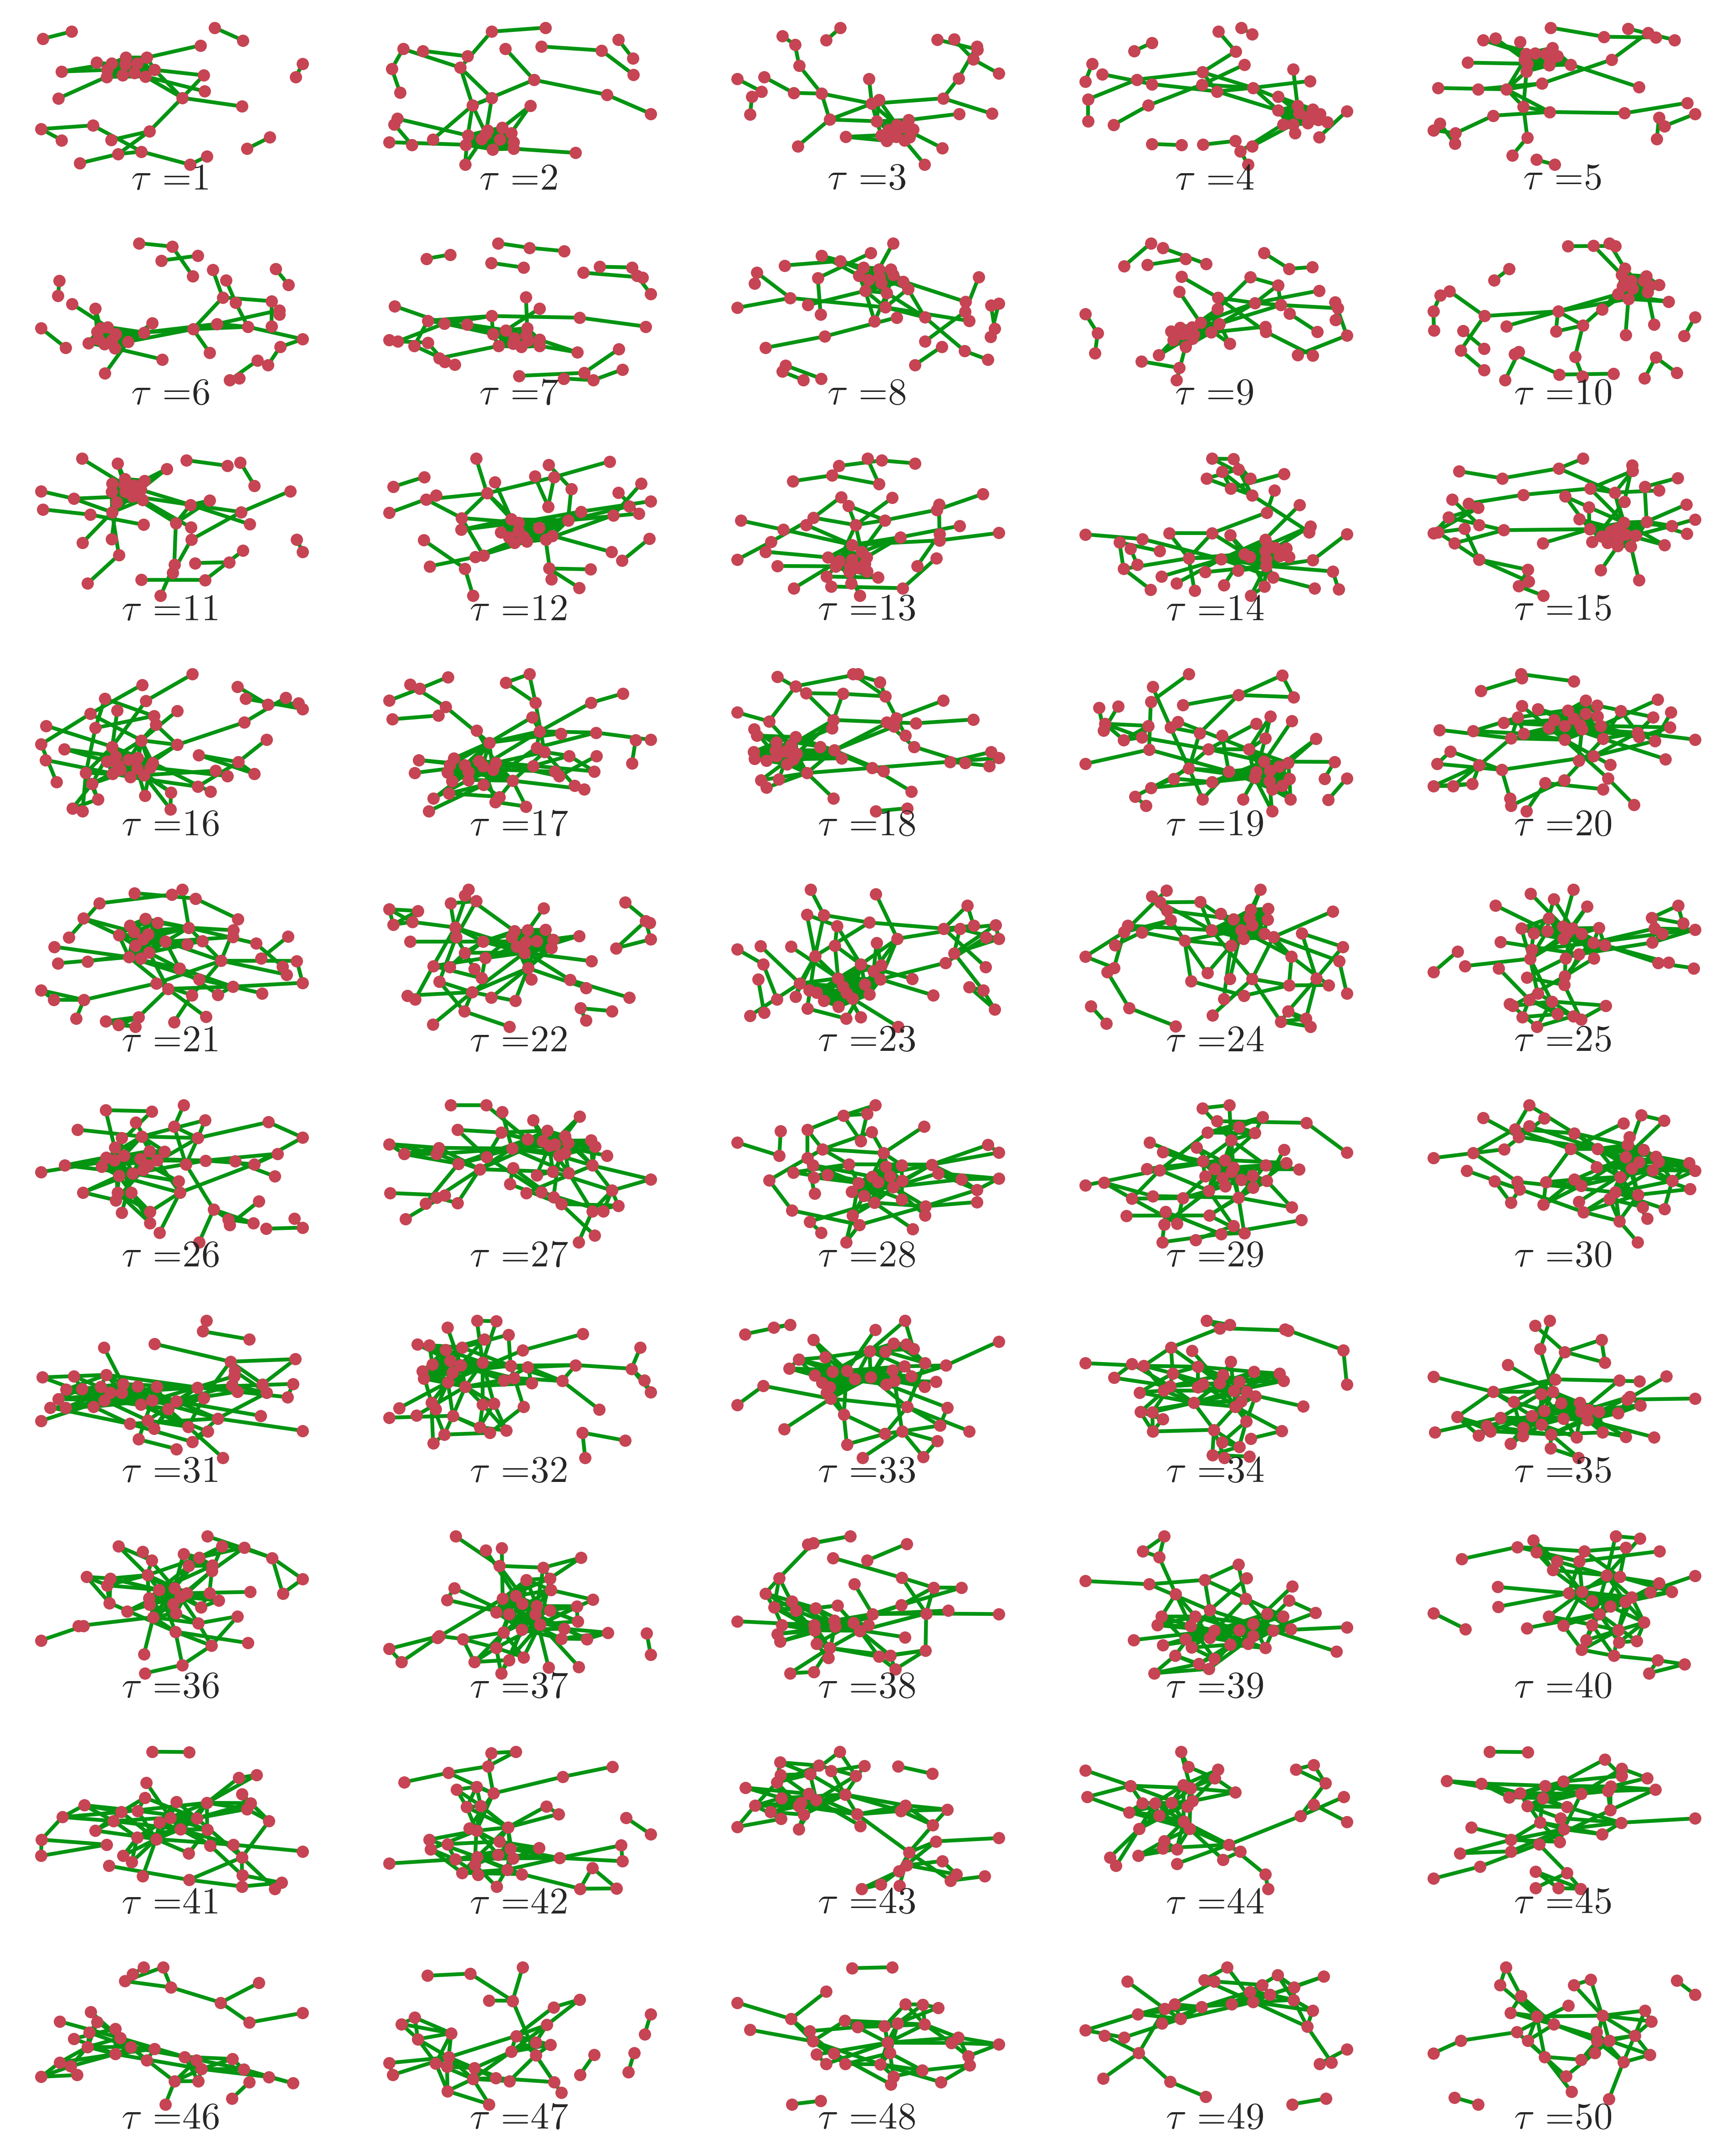

In [12]:
#import matplotlib.pyplot as plt
mydata = SFHH
mynodes = ij
d = np.zeros(120)
font_size = 10
plt.style.use('science')
fig = plt.figure(figsize=(25,10),dpi = 600)
t = 1800   ###一次选取30分钟的数据
b = 60 #滑动5分钟 
#fig.subplots_adjust(hspace=0.4, wspace=0.1)
gs = fig.add_gridspec(nrows=10,ncols=5,left=0.05,right=0.3,wspace=0.1,hspace=0.3) 
for N in range(50):
    bb = b*N
    ax = fig.add_subplot(gs[N//5, N%5])
    ax.set_title(r'$\tau = $'+str(N+1),y=-0.2,
              fontdict = {'family' : 'Times New Roman','size': font_size}
                )
    G = nx.Graph()
    for i in range(len(mydata)):
        if mydata['time'][i] >= mydata['time'][0]+bb:
            if mydata['time'][i] <= mydata['time'][0]+bb+ t:
                G.add_edge(mydata['i'][i],mydata['j'][i])
            else:
                break        
    pos = nx.spring_layout(G,k=0.5)
#    pos = nx.kamada_kawai_layout(G,dist = 0.5)

    #E0346D
    #6B124F
#    pos = nx.random_layout(G)
    nx.draw(G, pos=pos,node_color = '#C64453',edge_color = '#049412',node_size = 5,width = 1,with_labels = False)  # Draw the original graph
    
    #186665
    #049412

    
#plt.savefig('E:/Desktop/wxy/结果/figure3.eps',bbox_inches='tight',pad_inches=0.0)
#plt.savefig('E:/Desktop/Fig_3.svg',bbox_inches='tight',pad_inches=0.0)
plt.savefig('E:/figures/Fig_3.pdf',bbox_inches='tight',pad_inches=0.0)

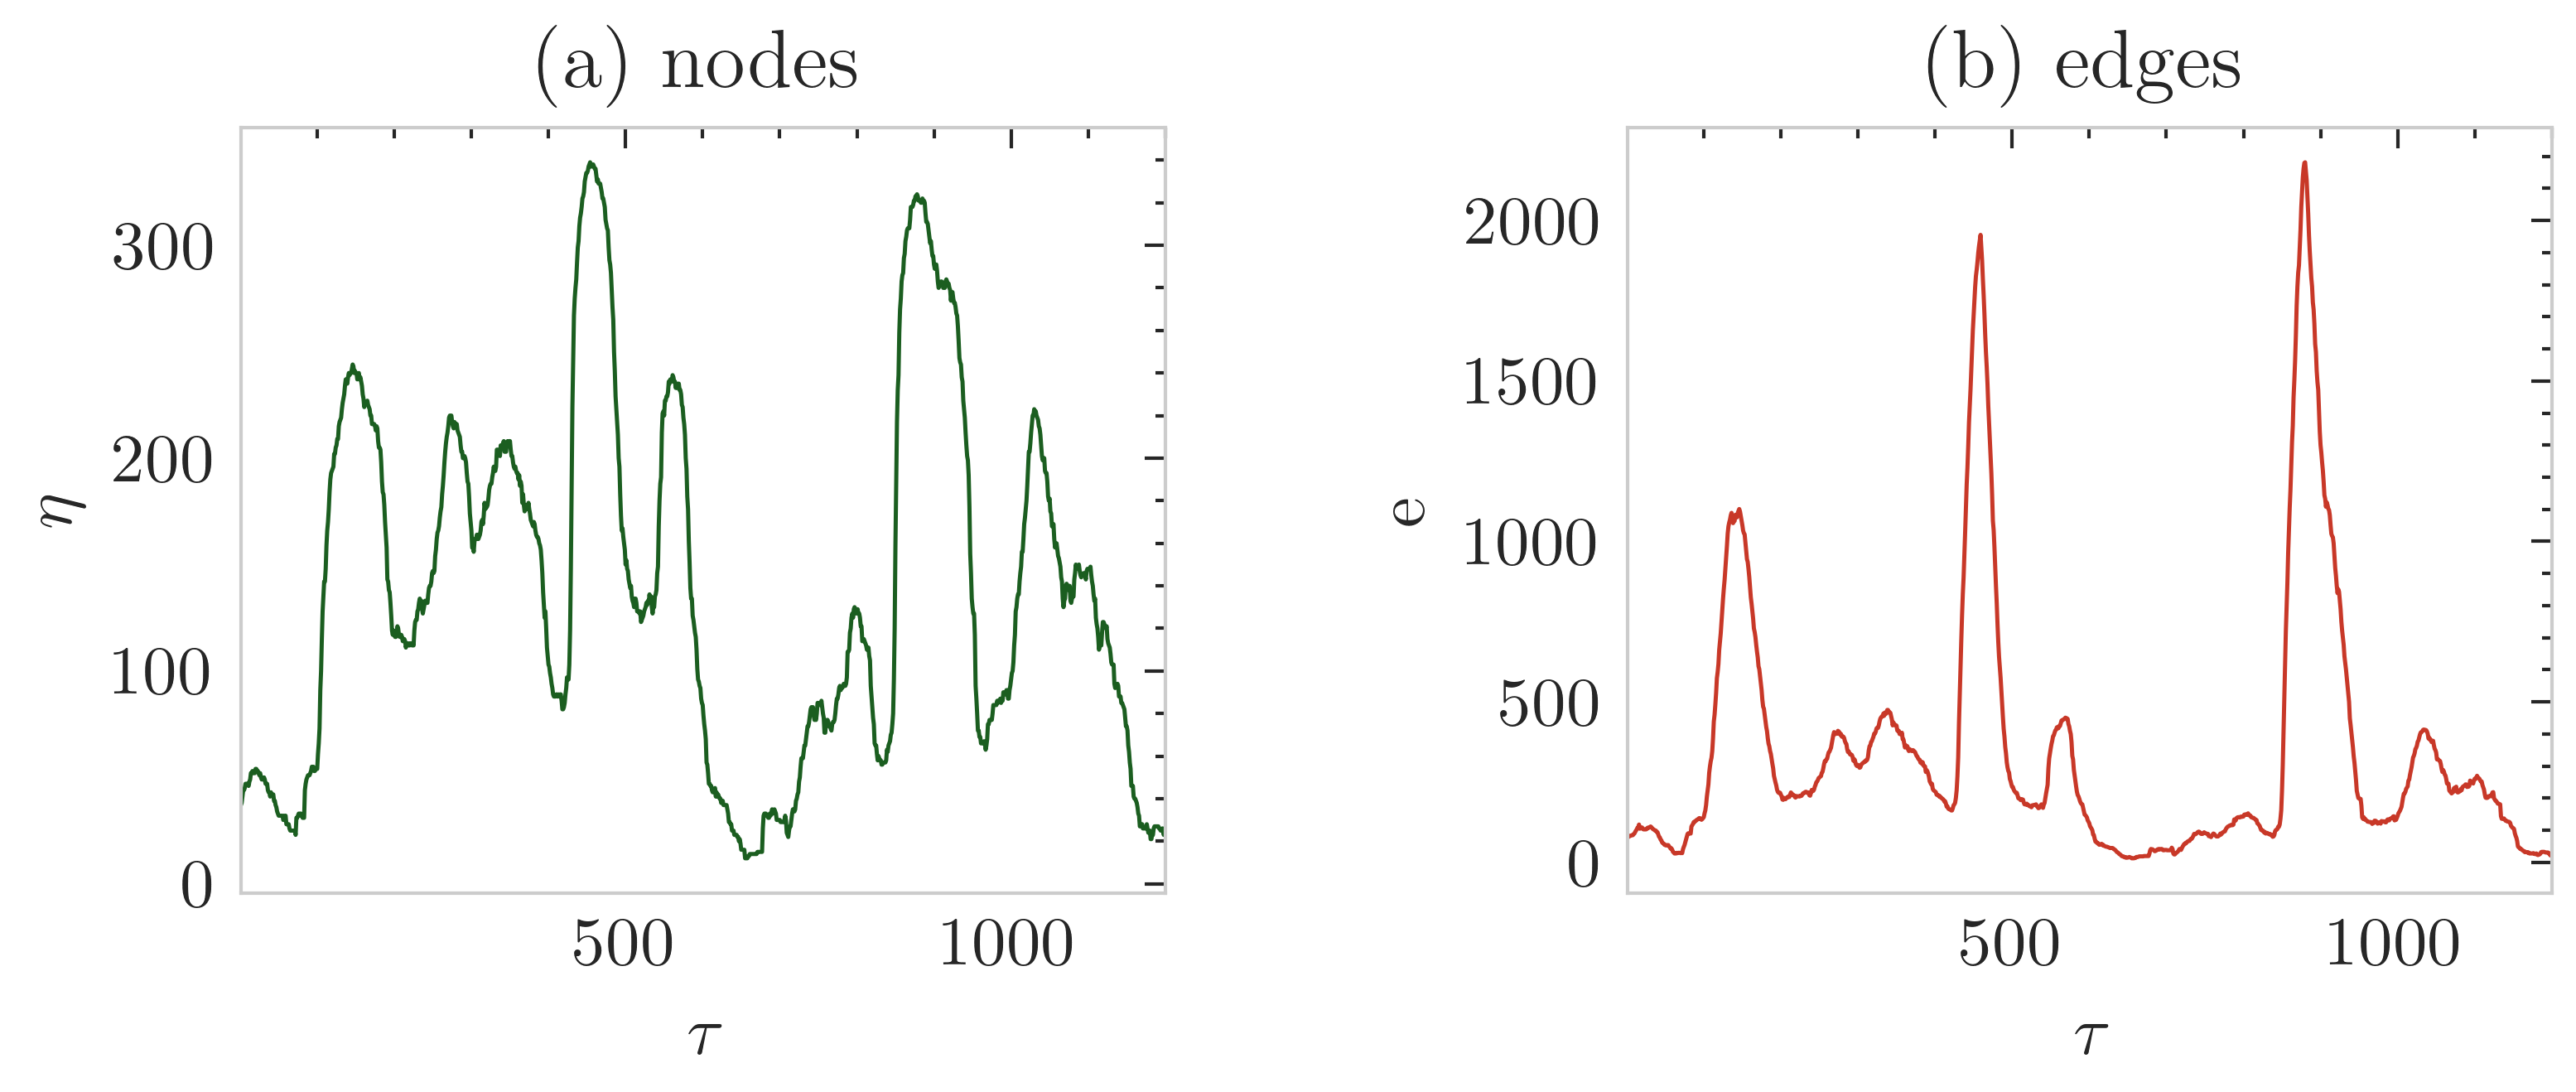

In [4]:
#import matplotlib.pyplot as plt
mydata = SFHH
mynodes = ij
data_n = 1200
nodes_n = np.zeros(data_n)
edges_n = np.zeros(data_n)
t = 1800   ###一次选取30分钟的数据
b = 60 #滑动5分钟 
for N in range(data_n):
    bb = b*N
    G = nx.Graph()
    for i in range(len(mydata)):
        if mydata['time'][i] >= mydata['time'][0]+bb:
            if mydata['time'][i] <= mydata['time'][0]+bb+ t:
                G.add_edge(mydata['i'][i],mydata['j'][i])
            else:
                break        
    nodes_n[N] = len(G.nodes())
    edges_n[N] = len(G.edges())
    
#plt.plot(nodes_n)
#plt.plot(edges_n)

plt.style.use('science') # ieee

linecolor = ('#1B5E20','#C83828','#4d5aaf')
plt.figure(figsize=(6,2),dpi=600)
plt.subplots_adjust(hspace=0.1, wspace=0.5)
font_size = 6
line_width = 0.6
plt.subplot(1,2,1)
plt.plot(np.arange(1,data_n+1),nodes_n, color=linecolor[0],linewidth = line_width,label = 'nodes')
plt.xlabel(r'$\tau$')

plt.title('(a) nodes')
#plt.yticks((0,100,200,300,400),fontproperties='Times New Roman', size=font_size)#设置大小及加粗
#plt.xticks((1,30,60,90,120),fontproperties='Times New Roman', size=font_size)
plt.xlim(1,data_n)
#plt.ylim(0,400)
plt.ylabel(r'$\eta$')
plt.grid(False)


plt.subplot(1,2,2)
plt.plot(np.arange(1,data_n+1),edges_n, color=linecolor[1],linewidth = line_width,label = 'edges')
plt.xlabel(r'$\tau$')
plt.title('(b) edges')
#plt.yticks((0,500,1000,1500,2000),fontproperties='Times New Roman', size=font_size)#设置大小及加粗
#plt.xticks(fontproperties='Times New Roman', size=font_size)
plt.xlim(1,data_n)
#plt.ylim(0,2000)
plt.ylabel('e')
#plt.legend(ncol=1,
#           prop = {'family' : 'Times New Roman','size': font_size},
#          frameon = False) # 显示图例

#plt.savefig('E:/Desktop/Fig_4.svg',bbox_inches='tight',pad_inches=0.0)
plt.grid(False)

plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_4.pdf',bbox_inches='tight',pad_inches=0.0)

In [23]:
def mynetwork(mydata,t,b):    ##数据集 ，节点集，时间间隔，滑动多少
    MYG = nx.Graph()
    MYG.add_nodes_from(ij['lable'])
    for i in range(len(mydata)):
        if mydata['time'][i] >= mydata['time'][0]+b:
            if mydata['time'][i] <= mydata['time'][0]+b+ t:
                MYG.add_edge(mydata['i'][i],mydata['j'][i])
            else:
                break                
    return MYG
t = 1800   ###一次选取30分钟的数据
b = 60 #滑动1分钟
data_n = 1200
mydata = SFHH
mynodes = ij
nodes_n = np.zeros(data_n)
edges_n = np.zeros(data_n)
gn = np.zeros(len(mynodes))
ij_n = len(mynodes)
G = np.empty(data_n,dtype = object)
A = np.empty(data_n,dtype = object)
#G = np.concatenate(G, axis=0)
for N in range(data_n):     
    G[N] = mynetwork(SFHH,t,N*b)
    A[N] = np.array(nx.adjacency_matrix(G[N]).todense())  
    for j in range(ij_n):
        if np.count_nonzero(A[j]) != 0:
            gn[j] = gn[j] + 1
plt.figure(figsize=(5,2),dpi=600)
#plt.plot(gn,'ro')
plt.style.use('science') # ieee

font_size = 6
plt.bar(np.arange(1,len(gn)+1),gn, width=1,color='blue')
plt.xlabel('${v}$$_i$',fontdict = {'family' : 'Times New Roman'})
plt.ylabel(r'$\gamma$'+'$_i$')
plt.grid(False)

plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_5.pdf',bbox_inches='tight',pad_inches=0.0)

KeyboardInterrupt: 

In [ ]:
data_n = 1200
allDir1 = 'm = 2'
allDir2 = 'm = 8'
#allDir1 = 'm不同'
#allDir2 = 'm不同,data_n = 1200
#allDir1 = 'b = 2'
#allDir2 = 'b = 8'


fname2 = ('CC.csv','CR.csv')


filenames_out1 =  'E:\\Desktop\\毕业论文\\论文1\\202311结果\\0.5\\情绪\\e不变\\情绪不传播\\m不同'
domain1 = os.path.abspath(filenames_out1)
data1_2 = pd.read_csv(os.path.join(domain1, allDir1, fname2[0]),nrows=50,
            header =None,dtype=np.str_,index_col=0, skiprows = [0])
data1_8 = pd.read_csv(os.path.join(domain1, allDir2, fname2[0]),nrows=50,
            header =None,dtype=np.str_,index_col=0, skiprows = [0])


filenames_out2 = 'E:\\Desktop\\毕业论文\\论文1\\202308结果\\0.5\\费米更新'
domain2 = os.path.abspath(filenames_out2)
data2_2 = pd.read_csv(os.path.join(domain2,'b = 2', fname2[0]),nrows=50,
            header =None,dtype=np.str_,index_col=0, skiprows = [0])
data2_8 = pd.read_csv(os.path.join(domain2,'b = 8', fname2[0]),nrows=50,
            header =None,dtype=np.str_,index_col=0, skiprows = [0])


pd.set_option('display.max_columns',None)  #设置列不限制数量
pd.set_option('display.max_rows',None)     #设置行不限制数量


data_max_2 = np.zeros((1200,2))
data_min_2 = np.zeros((1200,2))
data_mean_2 = np.zeros((1200,2))

data_max_8 = np.zeros((1200,2))
data_min_8 = np.zeros((1200,2))
data_mean_8 = np.zeros((1200,2))

for i in range(1,1201):
    a = str(i)
    data_max_2[i-1][0] = max(data1_2[i])
    data_min_2[i-1][0] = min(data1_2[i])
    data_mean_2[i-1][0] = np.sum(list(map(float, data1_2[i])))/len(data1_2[i])

    data_max_2[i-1][1] = max(data2_2[i])
    data_min_2[i-1][1] = min(data2_2[i])
    data_mean_2[i-1][1] = np.sum(list(map(float, data2_2[i])))/len(data2_2[i])

    data_max_8[i-1][0] = max(data1_8[i])
    data_min_8[i-1][0] = min(data1_8[i])
    data_mean_8[i-1][0] = np.sum(list(map(float, data1_8[i])))/len(data1_8[i])

    data_max_8[i-1][1] = max(data2_8[i])
    data_min_8[i-1][1] = min(data2_8[i])
    data_mean_8[i-1][1] = np.sum(list(map(float, data2_8[i])))/len(data2_8[i])





plt.figure(figsize=(7,3),dpi=600)
plt.style.use('science') # ieee
plt.subplots_adjust(hspace=0.3, wspace=0.3)
my_color = ('#C83828','#1B5E20')
mylabel = ['New rule (7)',' Feimi rule (5)']

ax_2=plt.subplot(1,2,1)  

for j in range(2):
    x = np.arange(1, 1201, 1)
    ax_2.plot(x,data_mean_2[:, j], color=my_color[j],linewidth = 1,label = mylabel[j])
    ax_2.plot(x,data_min_2[:, j], color=my_color[j],linestyle = '--',linewidth = 0.8,alpha=0.5,)
    ax_2.plot(x,data_max_2[:, j], color=my_color[j],linewidth = 0.8,alpha=0.5,linestyle = '--')
    ax_2.fill_between(x, y1=data_min_2[:, j], y2=data_max_2[:, j],color=my_color[j],alpha=0.3,linewidth=0)

    #ax.set_ylim([0,1])
#    labels = ax_2.get_xticklabels() + ax_2.get_yticklabels()
#    [label.set_fontname('Times New Roman') for label in labels]
plt.legend(ncol=1,loc = (0.4, 0.6)
#           frameon = False,
          ) # 显示图例
plt.grid(False)
plt.xlabel(r'$\tau$')
plt.ylabel('${f}$$_c$')
plt.title('(a) b = 1.2')

ax_8=plt.subplot(1,2,2)  
for j in range(2):
    x = np.arange(1, 1201, 1)
    ax_8.plot(x,data_mean_8[:, j], color=my_color[j],linewidth = 1,label = mylabel[j])
    ax_8.plot(x,data_min_8[:, j], color=my_color[j],linestyle = '--',linewidth = 0.8,alpha=0.5,)
    ax_8.plot(x,data_max_8[:, j], color=my_color[j],linewidth = 0.8,alpha=0.5,linestyle = '--')
    ax_8.fill_between(x, y1=data_min_8[:, j], y2=data_max_8[:, j],color=my_color[j],alpha=0.3,linewidth=0)

    #ax.set_ylim([0,1])
#    labels = ax.get_xticklabels() + ax.get_yticklabels()
#    [label.set_fontname('Times New Roman') for label in labels]
    
    
#ax_8.set_yticks((0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))
plt.legend(ncol=1,loc = (0.4, 0.6),
#           frameon = False,
          ) # 显示图例
plt.xlabel(r'$\tau$')
plt.ylabel('${f}$$_c$')
plt.title('(b) b = 1.8')
#    plt.grid(linestyle = '--',axis='y',color = 'black'，which='major')
plt.grid(False)

plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_6.pdf',bbox_inches='tight',pad_inches=0.0)

#plt.savefig('E:/Desktop/Fig_5.svg',bbox_inches='tight',pad_inches=0.0)


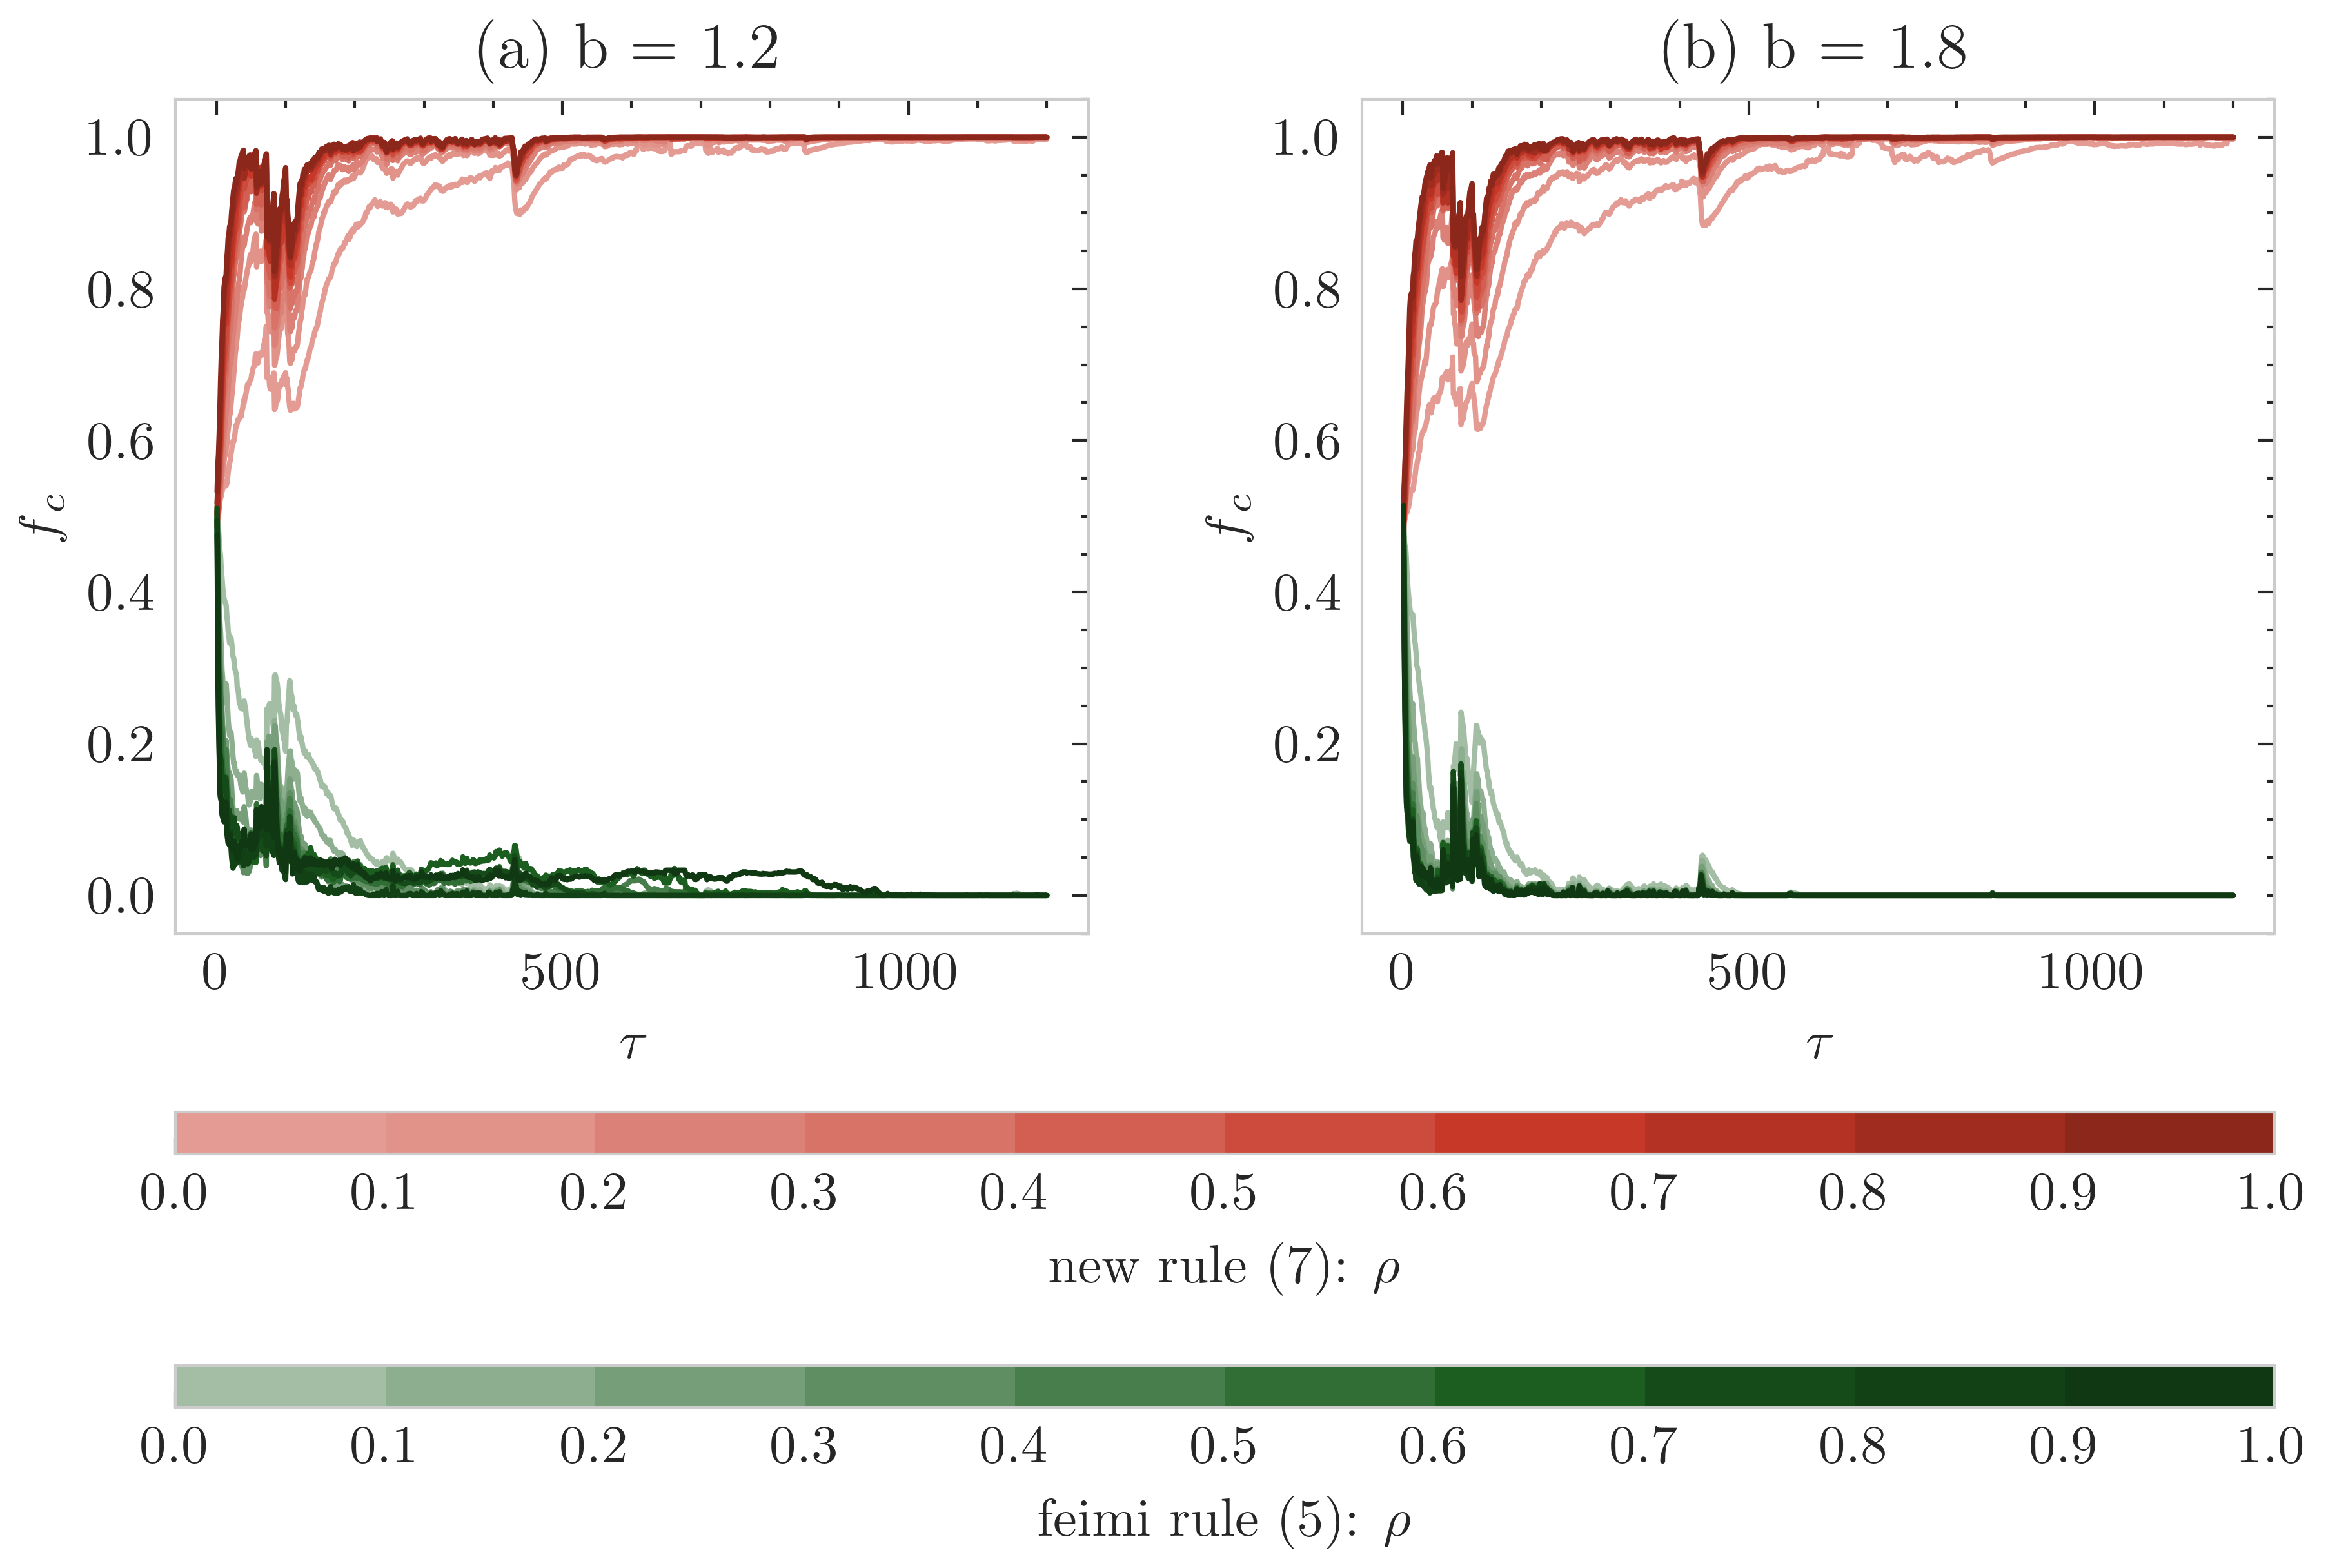

In [15]:
df_6 = pd.DataFrame({'tau': np.arange(1,data_n+1)})
data_n = 1200
#allDir1 = 'b = 2'
#allDir2 = 'b = 8'
#allDir1 ='lamda = 0.05'
#allDir2 ='lamda = 10'
fname2 = ('CC.csv','CR.csv')

plt.figure(figsize=(7,5),dpi=600)
plt.style.use('science') # ieee
plt.subplots_adjust(hspace=0.1, wspace=0.3)
mylabel = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#colors_green =['#35b93f','#32af3c','#2fa538','#2c9b35','#299131','#27862e','#247c2a','#217227','#1e6823',' #1b5e20']
#colors_red =['#eec3be',' #eab3ad','##e6a39c','#e3938a','#e08379','#dd7367','#da6255','#d75243','#d44131',' #c83828']
#colors_green = list(Color("#a3bea5").range_to(Color("#103813"),10))
#colors_red = list(Color("#e39b93").range_to(Color("#8c271c"),10))

colors_green =['#a3bea5','#8dae8f','#769e79','#5f8e62','#487e4c','#316e36','#1b5e20','#154b19','#124116','#103813']
colors_red =['#e39b93','#e1938a','#db8177','#d87368','#d35f52','#cd4b3d','#c83828','#b43224','#a02c20','#8c271c']



j = 0 

ax_2=plt.subplot(1,2,1)  
ax_8=plt.subplot(1,2,2)  

for a in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    filenames_out1 =  'E:\\Desktop\\毕业论文\\论文1\\202311结果'
    domain1 = os.path.abspath(filenames_out1)

    
    data1_2 = pd.read_csv(os.path.join(domain1,str(a),'情绪','e不变','情绪不传播','m不同','m = 2', fname2[0]),nrows=50,
                header =None,dtype=np.str_,index_col=0, skiprows = [0])
    data1_8 = pd.read_csv(os.path.join(domain1,str(a),'情绪','e不变','情绪不传播','m不同','m = 8',fname2[0]),nrows=50,
                header =None,dtype=np.str_,index_col=0, skiprows = [0])


    filenames_out2 = 'E:\\Desktop\\毕业论文\\论文1\\202308结果'
    domain2 = os.path.abspath(filenames_out2)
    data2_2 = pd.read_csv(os.path.join(domain2,str(a),'费米更新','b = 2', fname2[0]),nrows=50,
                header =None,dtype=np.str_,index_col=0, skiprows = [0])
    data2_8 = pd.read_csv(os.path.join(domain2,str(a),'费米更新','b = 8', fname2[0]),nrows=50,
                header =None,dtype=np.str_,index_col=0, skiprows = [0])


    pd.set_option('display.max_columns',None)  #设置列不限制数量
    pd.set_option('display.max_rows',None)     #设置行不限制数量


    data_max_2 = np.zeros((1200,2))
    data_min_2 = np.zeros((1200,2))
    data_mean_2 = np.zeros((1200,2))

    data_max_8 = np.zeros((1200,2))
    data_min_8 = np.zeros((1200,2))
    data_mean_8 = np.zeros((1200,2))

    for i in range(1,1201):
  

        data_mean_2[i-1][0] = np.sum(list(map(float, data1_2[i])))/len(data1_2[i])

        data_mean_2[i-1][1] = np.sum(list(map(float, data2_2[i])))/len(data2_2[i])


        data_mean_8[i-1][0] = np.sum(list(map(float, data1_8[i])))/len(data1_8[i])
        data_mean_8[i-1][1] = np.sum(list(map(float, data2_8[i])))/len(data2_8[i])



    df_6['New rule (7): rho = '+ str(a)],df_6['feimi rule (5): rho = '+ str(a)],df_6['b8New rule (7): rho = '+ str(a)],df_6['b8feimi rule (5): rho = '+ str(a)] = [data_mean_2[:, 0],data_mean_2[:, 1],data_mean_8[:, 0],data_mean_8[:, 1]]
 #   = pd.concat([df_6, data_mean_2[:, 0],data_mean_2[:, 1],data_mean_8[:, 0],data_mean_8[:, 1]], axis=1)
    
    x = np.arange(1, 1201, 1)
    ax_2.plot(x,data_mean_2[:, 0], 
              color=colors_red[j],
#              color=cmap1[j],
              linewidth = 1,label = mylabel[j])
    ax_2.plot(x,data_mean_2[:, 1], color=colors_green[j],linewidth = 1,label = mylabel[j])
#        ax_2.plot(x,data_min_2[:, j], color=my_color[j],linestyle = '--',linewidth = 0.8,alpha=0.5,)
#        ax_2.plot(x,data_max_2[:, j], color=my_color[j],linewidth = 0.8,alpha=0.5,linestyle = '--')
#        ax_2.fill_between(x, y1=data_min_2[:, j], y2=data_max_2[:, j],color=my_color[j],alpha=0.3,linewidth=0)


    plt.xlabel(r'$\tau$')
    plt.ylabel('${f}$$_c$')
    plt.title('(a) b = 1.2')
    plt.grid(False)
    
    ax_8.plot(x,data_mean_8[:, 0], color=colors_red[j],linewidth = 1,label = mylabel[j])
    ax_8.plot(x,data_mean_8[:, 1], color=colors_green[j],linewidth = 1,label = mylabel[j])
    plt.grid(False)
    j = j+1
        
#        ax_8.plot(x,data_min_8[:, j], color=my_color[j],linestyle = '--',linewidth = 0.8,alpha=0.5,)
#        ax_8.plot(x,data_max_8[:, j], color=my_color[j],linewidth = 0.8,alpha=0.5,linestyle = '--')
#        ax_8.fill_between(x, y1=data_min_8[:, j], y2=data_max_8[:, j],color=my_color[j],alpha=0.3,linewidth=0)

        #ax.set_ylim([0,1])
    #    labels = ax.get_xticklabels() + ax.get_yticklabels()
    #    [label.set_fontname('Times New Roman') for label in labels]

    
ax_8.set_yticks((0.2,0.4,0.6,0.8,1.0))
#plt.legend(ncol=2, title = "Strategy-updating rules:",
#           frameon = False,
#          ) # 显示图例
ax_8.set_xlabel(r'$\tau$')
ax_8.set_ylabel('${f}$$_c$')
ax_8.set_title('(b) b = 1.8')
ax_8.grid(False)

ax_2.set_xlabel(r'$\tau$')
ax_2.set_ylabel('${f}$$_c$')
ax_2.set_title('(a) b = 1.2')
ax_2.grid(False)




cmap1 = (mp1.colors.ListedColormap(['#e39b93','#e1938a','#db8177','#d87368','#d35f52','#cd4b3d','#c83828','#b43224','#a02c20','#8c271c']))
cmap2 = (mp1.colors.ListedColormap(['#a3bea5','#8dae8f','#769e79','#5f8e62','#487e4c','#316e36','#1b5e20','#154b19','#124116','#103813']))
 
norm1 = mp1.colors.Normalize(vmin=0, vmax=1) 

bounds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#norm1 = mp1.colors.BoundaryNorm(bounds, cmap1.N)
norm2 = mp1.colors.BoundaryNorm(bounds, cmap2.N)

sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm1) 
sm1.set_array([]) 


plt.colorbar(
    mp1.cm.ScalarMappable(cmap=cmap2, norm=norm2),
#    ticks=bounds,
    ticks=np.linspace(0, 1, 11),
    ax=[ax_2,ax_8],
#    ax=ax_2[1, 0]
    orientation='horizontal',
    label='feimi rule (5): '+r'$\rho$',
    spacing='uniform',
    aspect = 50,
    pad = 0.05
#    fraction = 0.5
    )

plt.colorbar(
#    mp1.cm.ScalarMappable(cmap=cmap1, norm=norm1),
    sm1,
    ax=[ax_2,ax_8],
    ticks=bounds,
    orientation='horizontal',
    label='new rule (7): '+r'$\rho$',
    spacing='proportional',
#    shrink = 0.5,
    aspect = 50,
#    pad = 0.1
    )

plt.grid(False)

plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_7.pdf',bbox_inches='tight',pad_inches=0.0)

In [ ]:
df_7 = pd.DataFrame({'tau': np.arange(1,data_n+1)})
plt.figure(figsize=(6,2),dpi=600)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
#fig, ax = plt.subplots()
plt.style.use('science') # ieee
mytitle = ['b = 1.2','b = 1.8']

j=1  
for allDir in ['m = 2','m = 8']:
    filenames_out = 'E:\\Desktop\\毕业论文\\论文1\\202311结果\\0.5\\情绪\\e不变\\情绪不传播\\m不同' 
    domain1 = os.path.abspath(filenames_out)  # 处理完文件保存地址
    fname2 = ('CC.csv','CR.csv')  
    data1_2 = pd.read_csv(os.path.join(domain1,allDir,fname2[0]),
                header =None,index_col=0, skiprows = [0])

    filenames_out1 = 'E:\\Desktop\\毕业论文\\论文1\\202311结果\\0.5\\情绪\\e变\\情绪不传播\\m不同'  
    domain11 = os.path.abspath(filenames_out1)  # 处理完文件保存地址
    data1_ = pd.read_csv(os.path.join(domain11,allDir,fname2[0]),
                header =None,index_col=0, skiprows = [0])

    df_7['xi_i^tau=xi_i'+allDir],df_7['xi_i^tau'+allDir] = [(np.sum(data1_2,axis = 0))/30,(np.sum(data1_,axis = 0))/30]
    plt.subplot(1,2,j) 
    my_color = ('#C83828','#316BCE',)
    plt.plot(np.arange(1, 1201, 1),(np.sum(data1_2,axis = 0))/30,linewidth = 0.8,
             label = r'$\xi_i^\tau$'+'='+r'$\xi_i$',
    #         r'$\xi$'+'_i^t = ' + r'$\xi$' + '_i',
            color=my_color[0])
    plt.plot(np.arange(1, 1201, 1),(np.sum(data1_,axis = 0))/30,linewidth = 0.8,
             label = r'$\xi_i^\tau$',
    #        +' ∈[0,10]' r'$\xi$'+'_i^t ∈ [0,1]',
            color=my_color[1])

    #plt.ylim(0.8,1)
    plt.xlabel(r'$\tau$')
    plt.ylabel('${f}$$_c$')
    plt.title(mytitle[j-1])
    plt.legend(ncol=1, 
#               title = "New rule (7):",
    #           frameon = False,
              ) # 显示图例
    j=j+1
    plt.grid(False)
#plt.savefig('E:/Desktop/Fig_7.svg',bbox_inches='tight',pad_inches=0.0)


plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_8.pdf',bbox_inches='tight',pad_inches=0.0)

In [ ]:
df_8 = pd.DataFrame({'tau': np.arange(1,data_n+1)})
plt.figure(figsize=(6,2),dpi=600)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
#fig, ax = plt.subplots()
plt.style.use('science') # ieee


filenames_out = 'E:\\Desktop\\毕业论文\\论文1\\202311结果\\0.5\\情绪\\e不变\\情绪不传播\\m不同' 
domain1 = os.path.abspath(filenames_out)  # 处理完文件保存地址
fname2 = ('CC.csv','CR.csv')  
data1_2 = pd.read_csv(os.path.join(domain1,'m = 2',fname2[0]),
            header =None,index_col=0, skiprows = [0])

filenames_out1 = 'E:\\Desktop\\毕业论文\\论文1\\202308结果\\0.5\\情绪\\e不变\\情绪传播'  
domain11 = os.path.abspath(filenames_out1)  # 处理完文件保存地址
data1_ = pd.read_csv(os.path.join(domain11,'b = 2',fname2[0]),
            header =None,index_col=0, skiprows = [0])


plt.subplot(1,2,1) 
my_color = ('#C83828','#316BC7',)
plt.plot(np.arange(1, 1201, 1),(np.sum(data1_2,axis = 0))/30,linewidth = 0.8,
         label = r'$\xi_i^\tau$'+'='+r'$\xi_i$',
#         r'$\xi$'+'_i^t = ' + r'$\xi$' + '_i',
        color=my_color[0])
plt.plot(np.arange(1, 1201, 1),(np.sum(data1_,axis = 0))/30,linewidth = 0.8,
#         label = r'$\xi_i^\tau$'+'='+ r'$\overline{\xi}_j^{\tau-1}$',
        label = r'$\xi_i^\tau$ ='+ r'$<\xi_i^{\tau}>$',
#        +' ∈[0,10]' r'$\xi$'+'_i^t ∈ [0,1]',
        color=my_color[1])

#plt.ylim(0.8,1)
plt.xlabel(r'$\tau$')
plt.ylabel('${f}$$_c$')
plt.title('(a) b = 1.2')
plt.legend(ncol=1, 
#               title = "New rule (7):",
#           frameon = False,
          ) # 显示图例
plt.grid(False)

filenames_out = 'E:\\Desktop\\毕业论文\\论文1\\202311结果\\0.5\\情绪\\e不变\\情绪不传播\\m不同' 
domain1 = os.path.abspath(filenames_out)  # 处理完文件保存地址
fname2 = ('CC.csv','CR.csv')  
data1_8 = pd.read_csv(os.path.join(domain1,'m = 8',fname2[0]),
            header =None,index_col=0, skiprows = [0])

filenames_out1 = 'E:\\Desktop\\毕业论文\\论文1\\202308结果\\0.5\\情绪\\e不变\\情绪传播'  
domain11 = os.path.abspath(filenames_out1)  # 处理完文件保存地址
data2_8 = pd.read_csv(os.path.join(domain11,'b = 8',fname2[0]),
            header =None,index_col=0, skiprows = [0])


plt.subplot(1,2,2) 
my_color = ('#C83828','#316BC7',)
plt.plot(np.arange(1, 1201, 1),(np.sum(data1_8,axis = 0))/30,linewidth = 0.8,
         label = r'$\xi_i^\tau$'+'='+r'$\xi_i$',
#         r'$\xi$'+'_i^t = ' + r'$\xi$' + '_i',
        color=my_color[0])
plt.plot(np.arange(1, 1201, 1),(np.sum(data2_8,axis = 0))/30,linewidth = 0.8,
#         label = r'$\xi_i^\tau$'+'='+ r'$\overline{\xi}_j^{\tau-1}$',
          label = r'$\xi_i^\tau$ ='+ r'$<\xi_i^{\tau}>$',
#        +' ∈[0,10]' r'$\xi$'+'_i^t ∈ [0,1]',
        color=my_color[1])

#plt.ylim(0.8,1)
plt.xlabel(r'$\tau$')
plt.ylabel('${f}$$_c$')
plt.title('(b) b = 1.8')
plt.legend(ncol=1, 
#               title = "New rule (7):",
#           frameon = False,
          ) # 显示图例
#plt.savefig('E:/Desktop/Fig_8.svg',bbox_inches='tight',pad_inches=0.0)

#df_8['2xi_i^tau=xi_i'],df_8['2xi_i^tau = <xi_i^tau>'],df_8['xi_i^tau'],df_8['xi_i^tau=<xi_i^tau>'] = [(np.sum(data1_2,axis = 0))/30,(np.sum(data1_,axis = 0))/30,(np.sum(data1_8,axis = 0)),(np.sum(data2_8,axis = 0))/30]
#df_8.to_csv('E:/PLA/fig_data/Fig.8_data.csv', index=0)
plt.grid(False)

plt.savefig('E:/Template-for-Journal-of-Complex-Networks-28COMNET-29/Template-for-Journal-of-Complex-Networks(COMNET)/figures/Fig_9.pdf',bbox_inches='tight',pad_inches=0.0)